In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utils import SOUND_SPEED, fractionalOctaves, plot_bin_hist
import mitsuba

In [2]:
mitsuba.set_variant("scalar_spectral")

In [3]:
def make_acoustic_step_width(step_width):
    return mitsuba.core.xml.load_string(f'''
        <spectrum version='2.0.0' type='acoustic'>
            <float name="lambda_min" value="0.017"/>
            <float name="lambda_max" value="17"/>
            <integer name="octave_step_width" value="{step_width}"/>
        </spectrum>''').expand()[0]

def fractionalOctaveBin(f_high, f):
    #return np.argmax(f_high > f, axis=0)
    return np.searchsorted(f_high, f)

center, low, high, nominal = fractionalOctaves(frac=1, f=(20, 20000))

In [7]:
from mitsuba.render import SurfaceInteraction3f

obj = make_acoustic_step_width(1)

si = SurfaceInteraction3f()

uniforms = np.random.uniform(size=10000)
samples = []
for i in uniforms:
    sampled = obj.sample_spectrum(si, i)[0]
    samples.append(sampled[0])
    
    
flat_samples = np.array(samples)

2021-01-18 11:18:40 INFO main [xml.cpp:355] "<string>": in-memory version upgrade (v2.0.0 -> v2.2.1) ..

In [28]:
wavs = np.flip(343 / np.concatenate(([low[0]],high)))
bins = fractionalOctaveBin(wavs, flat_samples)
print(wavs)
print(min(flat_samples))

[1.53212472e-02 3.05699072e-02 6.09949838e-02 1.21700993e-01
 2.42825404e-01 4.84500378e-01 9.66705345e-01 1.92883075e+00
 3.84852330e+00 7.67881351e+00 1.53212472e+01 3.05699072e+01]
0.015336564742028713


{0: 931.0, 1: 996.0, 2: 1000.0, 3: 984.0, 4: 1012.0, 5: 978.0, 6: 1023.0, 7: 1042.0, 8: 1032.0, 9: 1002.0}


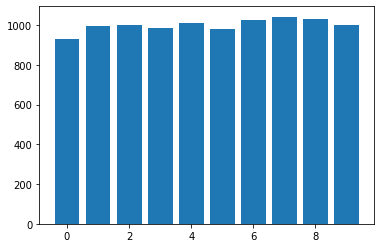

In [32]:
plot_bin_hist(bins - 1, 10)